# Directory of Vizualisations


This section is a quick overview of various types of plots and charts typically used in data visualisation. We will provide guidance of which types of plots are best different types of data and hints of what to be careful of when using a given chart. 


We emphasise that figures are a graphical layer on top of your data. **The nature of the figure should be dictated by the nature of the data**.

Though different types of data lend itself to different styles of chart, the figure components discussed in _Rules of the Data Vizualisation Game_ applies to all figures. All figures should be appropriately scaled, coloured, and labelled.


[hackmd notes](https://hackmd.io/iO0-zr1xQWqC097-neJxSA?view)

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.patches as mpatches
#
import matplotlib.pyplot as plt
sns.set_theme(style="whitegrid")
sns.set_style("white")

## Amounts

Here we are interested in the magnitude of some set of number: We have a set of categories and a quantitative value for each category. We show four broad types of data.

### Bar chart

Bar are a good option when the dataset we want to visualise data that contains **numerical values for a set of categories**. Here some points to consider when using a this type of chart in a figure:

- The **bar length** is proportional to the amount shown, therefore bars need to start at zero.
- **Labels** identifying each bar can take up a lot of horizontal space, in this case is better to use horizontal bars.
- The **order** in which the bars are arranged is importyant. If the bars represent unordered categories, order them by ascending or descending data values. 
- Bar charts are not good for very large datasets, if the **number of categories** is very large the resulting figure can become too busy. 

#### **Examples**:


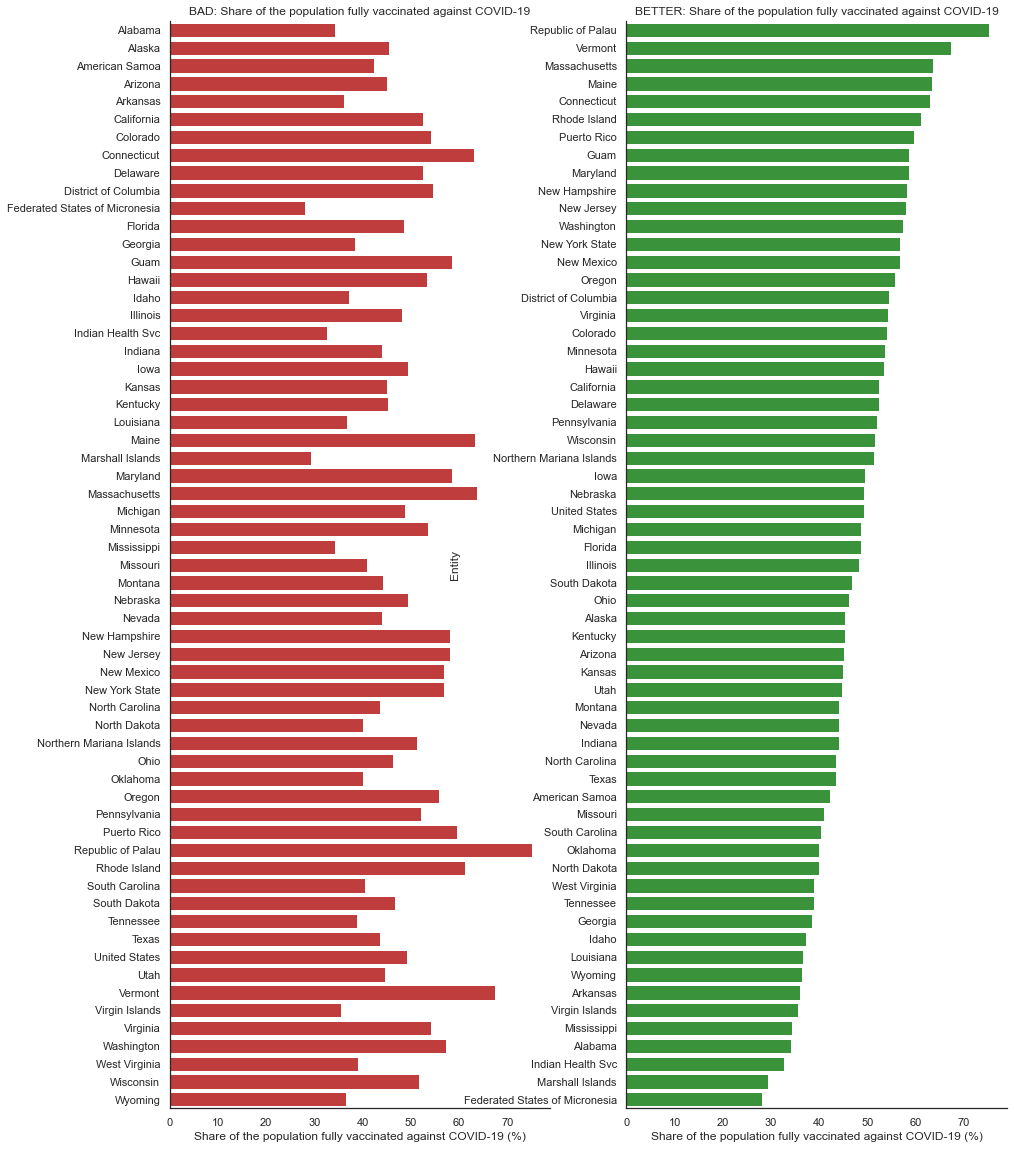

In [115]:
# read the data from here https://ourworldindata.org/us-states-vaccinations
df_vaccination = pd.read_csv('data/us-covid-share-fully-vaccinated.csv', sep=',', parse_dates=['Day'])

# look at max day avalaible for cumulative vaccination data
max_day = df_vaccination['Day'].max()
df_vaccination_max = df_vaccination[df_vaccination['Day']==max_day]

# Example of a better plot. 
df_vaccination_sorted = df_vaccination_max.sort_values(by='people_fully_vaccinated_per_hundred', ascending=False)

# Example of an non useful plot. 
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 20))
# Load the dataset
sns.barplot(ax = ax1, x="people_fully_vaccinated_per_hundred", y="Entity", data=df_vaccination_max, color='tab:red',errwidth=0)
ax1.set_title('BAD: Share of the population fully vaccinated against COVID-19',fontsize=12)
ax1.set_xlabel('Share of the population fully vaccinated against COVID-19 (%)')
ax1.set_ylabel('State')
sns.barplot(ax=ax2, x="people_fully_vaccinated_per_hundred", y="Entity", data=df_vaccination_sorted, color='tab:green',errwidth=0)
ax2.set_title('BETTER: Share of the population fully vaccinated against COVID-19',fontsize=12)
ax2.set_xlabel('Share of the population fully vaccinated against COVID-19 (%)')
ax1.set_ylabel('')
sns.despine(left=False, bottom=False)
plt.show()


### Dot charts:

Dot charts are an alternative to bar chart and have the advantage that they do not have to start a zero. Because of this, dot charts can beuseful when you want to visualise **numerical values for a set of categories with small differences between categories**. 

Similarly to bar charts, dot charts should be **ordered** by data values (for un-ordered categories) and we should beware of visualising datasets with a very **large number of categories**.

#### Example

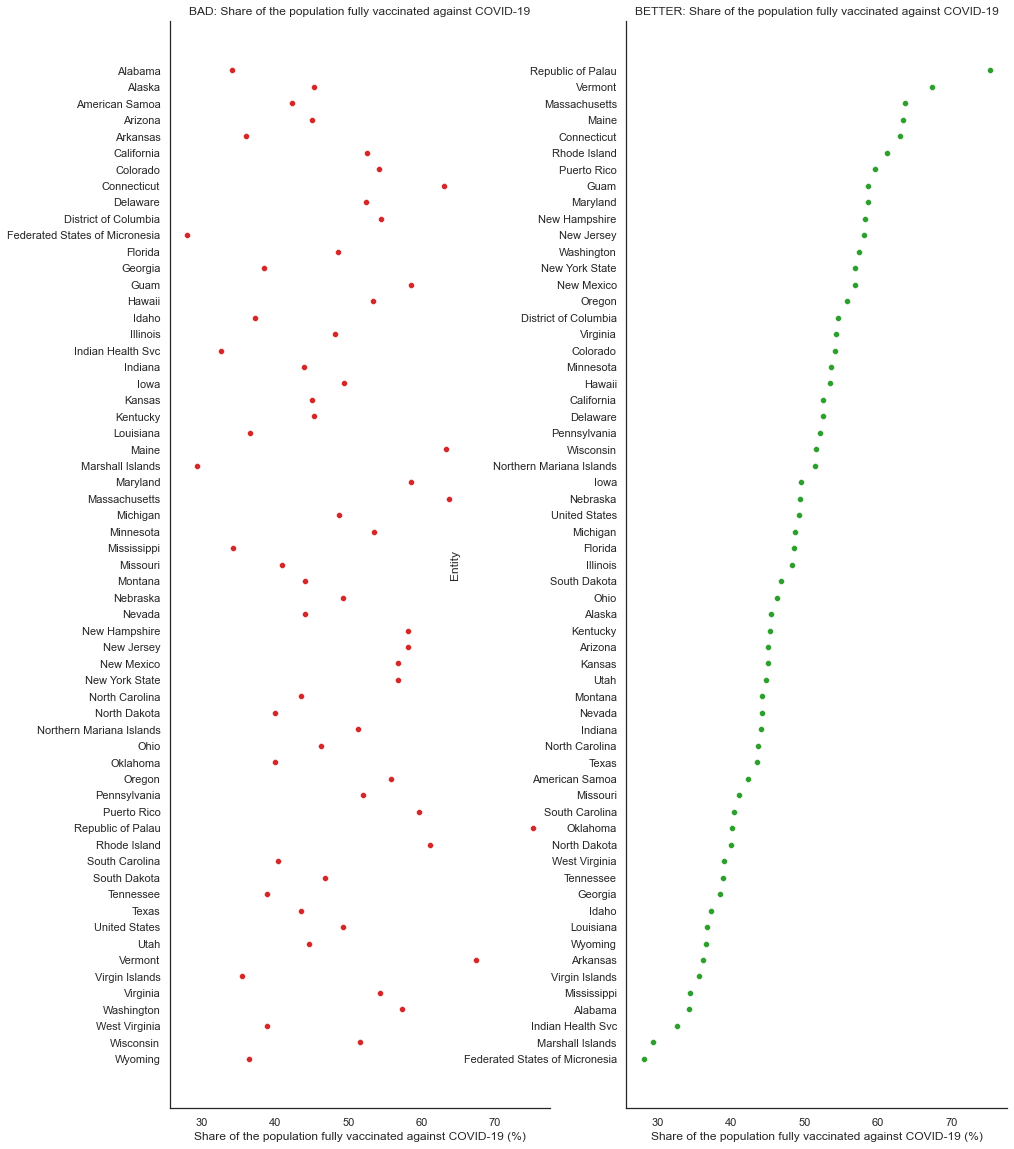

In [60]:
# Example of an non useful plot. 
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 20))
# Load the dataset
sns.scatterplot(ax = ax1, x="people_fully_vaccinated_per_hundred", y="Entity", data=df_vaccination_max, color='tab:red')
ax1.set_title('BAD: Share of the population fully vaccinated against COVID-19',fontsize=12)
ax1.set_xlabel('Share of the population fully vaccinated against COVID-19 (%)')
ax1.set_ylabel('State')
sns.scatterplot(ax=ax2, x="people_fully_vaccinated_per_hundred", y="Entity", data=df_vaccination_sorted, color='tab:green')
ax2.set_title('BETTER: Share of the population fully vaccinated against COVID-19',fontsize=12)
ax2.set_xlabel('Share of the population fully vaccinated against COVID-19 (%)')
ax1.set_ylabel('')
sns.despine(left=False, bottom=False)
plt.show()


### Heatmaps 

You can use heatmaps when you you are interested in highlighting a trend in a dasaset with **numerical values for a set of categories and for different groups**.

Some points to beware of when using heatmaps:

- Similarly to bar charts, ther **ordering of the categorical data** values matters.
- Heatmaps can be easy to misread, for example, the **color scale can create a misperception of the magnitude of the data.** The two most common ranges of colors to use in heatmaps are sequential and diverging scales.
- Heatmaps should primarily be used to **illustrate patterns**, not to replace tables.

Text(1159.5440340909088, 0.5, '')

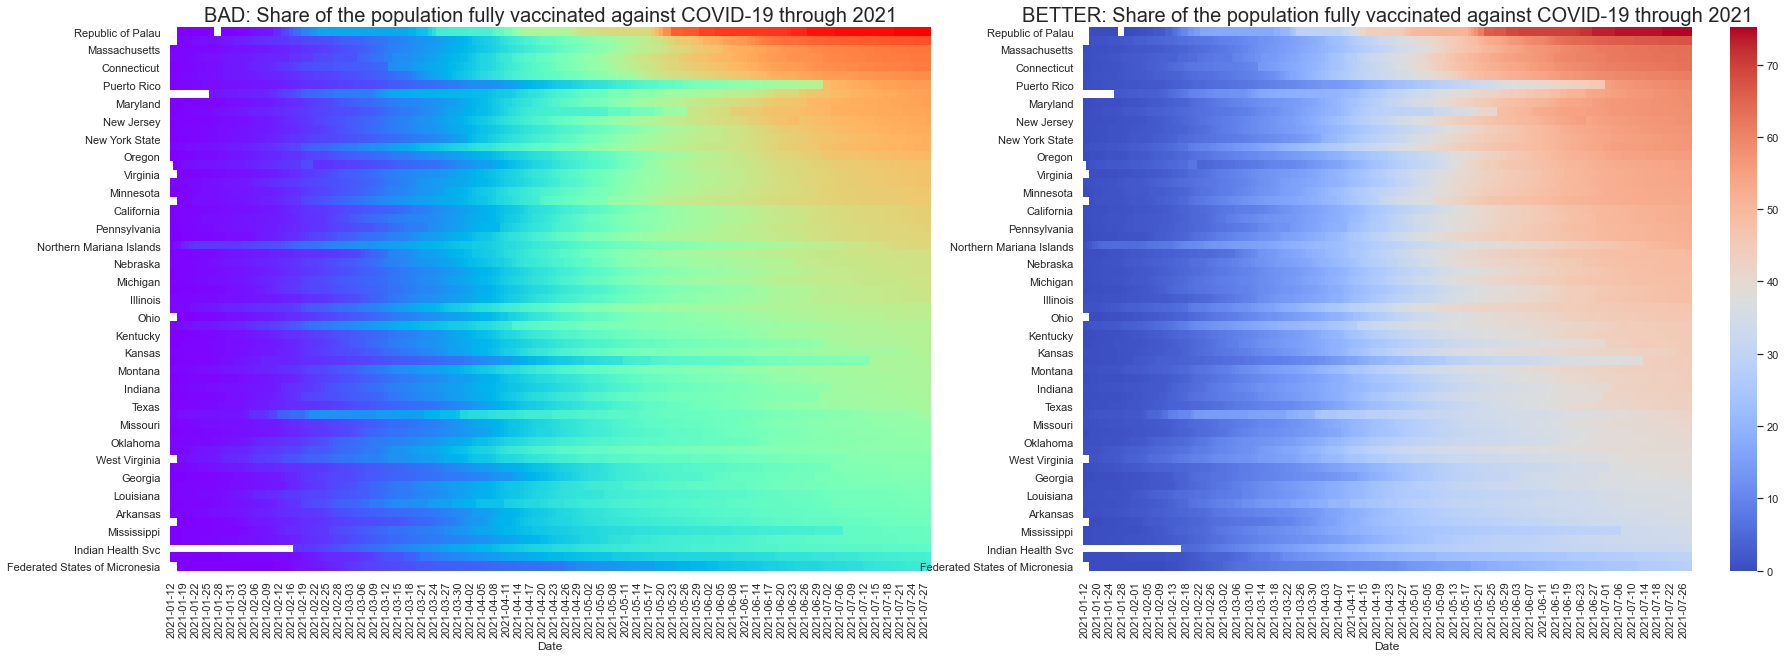

In [195]:
df_vaccination['Date'] = df_vaccination['Day'].dt.date

#creating a pivot table for easy heatmap visualisation
df = pd.pivot_table(data=df_vaccination,
                    values='people_fully_vaccinated_per_hundred',
                    columns='Date',
                    index='Entity')

# ordering columns by percentage of vaccination
df.index = pd.CategoricalIndex(df.index, categories= df_vaccination_sorted.Entity)
df.sort_index(level=0, inplace=True)

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(30, 10))
ax1.set_title('BAD: Share of the population fully vaccinated against COVID-19 through 2021',fontsize=20)
sns.heatmap(df, cmap = 'rainbow', cbar=False, ax=ax1)
ax1.set_ylabel('')
ax2.set_title('BETTER: Share of the population fully vaccinated against COVID-19 through 2021',fontsize=20)
ax2 = sns.heatmap(df, cmap='coolwarm', cbar=True, ax = ax2)
ax2.set_ylabel('')


## Distributions

We use these figures to understand how one or many particular variables are distributed in a dataset.

### Histograms

Histograms are used to show frequencies of occurences of a continous variable. Histograms are generated by binning the data (grouping the data values into a number of ranges), so their visual appearance depends on the choice of the bin width. When working with histograms is best practice to always explore multiple bins widths. 

**Examples**

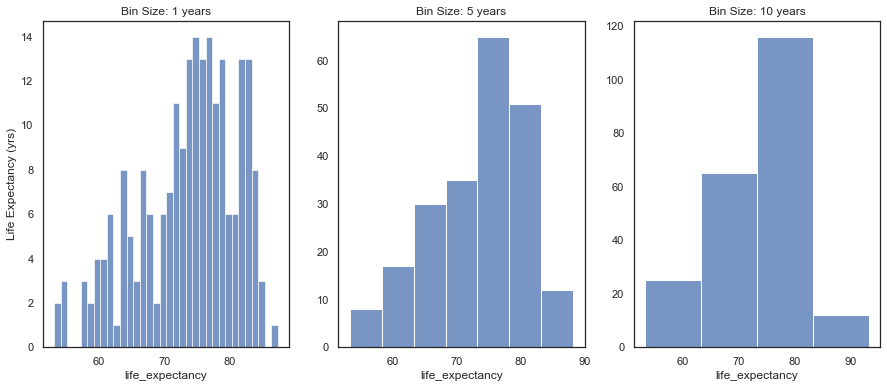

In [214]:
# To illustrate these we will use data on Covid-19 hosted by our world in data. 
url = 'https://raw.githubusercontent.com/owid/covid-19-data/master/public/data/owid-covid-data.csv'
df = pd.read_csv(url, parse_dates=['date'])

df_countries = df[(df['continent'].notna())]

df_life_exp = df_countries.filter(regex="loc|life *").drop_duplicates()

f, axes = plt.subplots(1,3,figsize =(15,6))

bin_years = [1,5,10]

for (i, b) in enumerate(bin_years):
    sns.histplot(data = df_life_exp, x='life_expectancy', binwidth=b, ax=axes[i])
    axes[i].set_title(f"Bin Size: {b} years")
    axes[i].set_ylabel('Life Expectancy (yrs)')
    if i>0:
        axes[i].set_ylabel('')

                    
    
plt.show()

### Kernel density figures 

Kernel density estimation (KDE) is a way to estimate the probability density function of a random variable. We can use it to turn histograms of a continous variable into distribution courves. 

Kernel density plots are highly sensitive to a banwidth parameter used to estimate the density funciton. It behaves similarly to the bin width in histograms and can affect the appaearance of the figure. As a resutl the plot may misrepresent the data leading to incorrect conclusions. Furthermore, KDE can produce the appearance of data where none exists (in particular in the tails of the distribution), again leading to incorrect results.

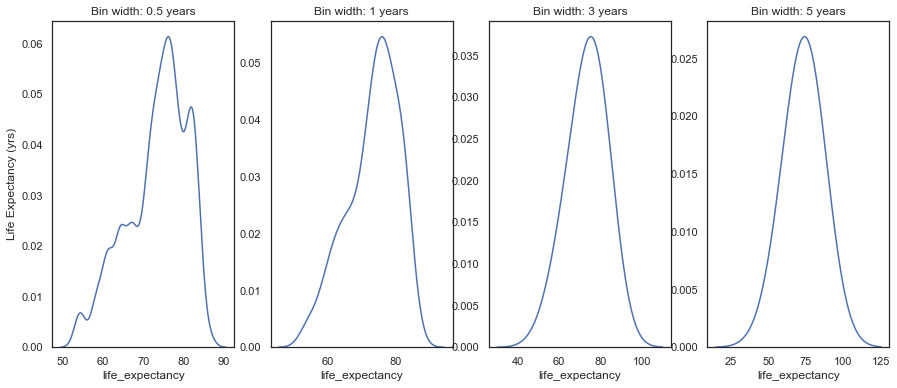

In [215]:
f, axes = plt.subplots(1,4,figsize =(15,6))

bin_years = [0.5,1,3,5]

for (i, b) in enumerate(bin_years):
    sns.kdeplot(data = df_life_exp, x='life_expectancy', bw_adjust=b, ax=axes[i])
    axes[i].set_title(f"Bin width: {b} years")
    axes[i].set_ylabel('Life Expectancy (yrs)')
    if i>0:
        axes[i].set_ylabel('')
                    
plt.show()

## Proportions

Figures that show how some group, entity, or amount breaks down into individual pieces that each represent a proportion of a whole. 

### Grouped bars 

We can use grouped bar charts when our dataset has **numerical values for a set of categories for different groups**. When using grouped bars beware that they can contain a lot of information at once and be confusing, so there might be a better way of visualising the message you want to transmit. 

### Staked bars

We can use grouped bar charts when our dataset has **numerical values for a set of categories for different groups when the sum of the amounts represented by the individual groups is important for the message.**. The can be useful when the point is to show that a value is the sum of other values, but you’re only interested in comparing the totals.

When using grouped bars beware they get harder to read the more segments each bar has and that they do not allow for an eady visual comparison of relative proportions.

### Pie charts

In general, pie charts can work well when we want to highlight simple fractions, between a small number of categories. They also work well when we have very small datasets. 

A summary of the various pros and cons of pie charts, stacked bars, and side-by-side bars extracted from the book [Fundamentals of data visualisation](https://clauswilke.com/dataviz/visualizing-proportions.html#a-case-for-pie-charts) is shown in the next figure.

<td> <img src="proportions_table.png" alt="Drawing" style="width: 550px;"/> </td>
